## Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('./datasets/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


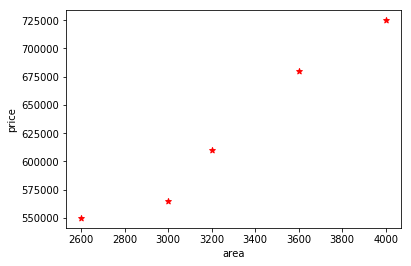

In [5]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='*')

In [7]:
area = df['area']
price = df['price']
reg = linear_model.LinearRegression()
reg.fit(area.values.reshape(-1, 1), price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
prediction = reg.predict([[3000]])
print('Predicted value = ' + str(prediction[0]))
print('Real value = ' + str(price[1]))
print('error = ' + str((prediction[0] - price[1])/(price[1])))

Predicted value = 587979.4520547945
Real value = 565000
error = 0.040671596557158456


In [15]:
reg.coef_

array([135.78767123])

In [16]:
reg.intercept_

180616.43835616432

<font color=blue>
### y = m * x + b </font>
m = reg.coef_[0] <br>
b = reg.intercept_


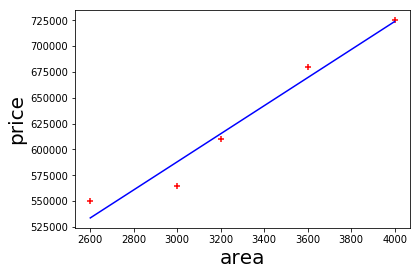

In [20]:
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(area.values.reshape(-1, 1)),color='blue')

In [32]:
area = df['area']
area = np.c_[area,area**2]
print(area.shape)

area = df['area']
area = np.array([area,area**2])
print(area.shape)

(5, 2)
(2, 5)


In [33]:
area = area.T
price = df['price']
reg = linear_model.LinearRegression()
reg.fit(area, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
prediction = reg.predict([[3000,9000000]])
print('Predicted value = ' + str(prediction[0]))
print('Real value = ' + str(price[1]))
print('error = ' + str((prediction[0] - price[1])/(price[1])))

Predicted value = 583340.5639913232
Real value = 565000
error = 0.03246117520588182


In [36]:
print(reg.coef_)
print(reg.intercept_)

[-8.57054822e+01  3.34623348e-02]
539295.9968448034


<font color=blue>
 $ y = ax^2 + bx + c $ </font>

a = reg.coef_[0] <br>
b = reg.coef_[1] <br>
c = reg.intercept_



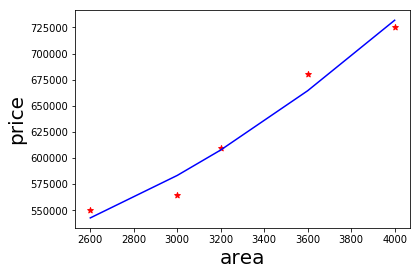

In [38]:
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(area),color='blue')

<font color=red>
## Overfitting example!
<font>

In [39]:
area = df['area']
area = np.array([area,area**2,area**3,area**4,area**5])
area = area.T
price = df['price']
reg = linear_model.LinearRegression()
reg.fit(area, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
x = 3000
prediction = reg.predict([[x,x**2,x**3,x**4,x**5]])
print('Predicted value = ' + str(prediction[0]))
print('Real value = ' + str(price[1]))
print('error = ' + str((prediction[0] - price[1])/(price[1])))

Predicted value = 564929.8528710529
Real value = 565000
error = -0.00012415421052580387


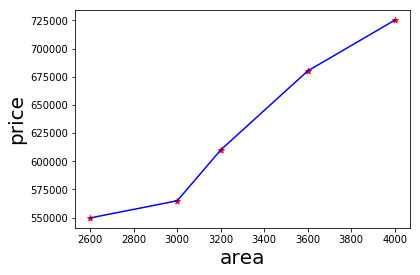

In [41]:
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(df.area,reg.predict(area),color='blue')

## Linear Regression Multiple Variables

In [65]:
df = pd.read_csv('./datasets/homeprices2.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
area        6 non-null int64
bedrooms    5 non-null float64
age         6 non-null int64
price       6 non-null int64
dtypes: float64(1), int64(3)
memory usage: 272.0 bytes


In [69]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bedrooms']

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [70]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
print(reg.coef_)
print(reg.intercept_)

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540396


In [75]:
prediction = reg.predict([[4000, 5, 8]])
print('Predicted value = ' + str(prediction[0]))
print('Real value = ' + str(df.price[4]))
print('error = ' + str((prediction[0] - df.price[4])/(df.price[4])))

Predicted value = 760663.4267545748
Real value = 760000
error = 0.0008729299402299435
